In [1]:
import pandas as pd
import numpy as np
import urllib.request
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal as ps

In [2]:
df201501 = pd.read_csv("growth201501.csv", index_col=0)
df201501['zipcode'] = df201501['zipcode'].astype('str')
df201501.head()

,zipcode,growth201501
0,11436,885.0
1,11213,531.0
2,11212,537.0
3,11225,379.0
4,11218,133.0


In [3]:
df201801 = pd.read_csv("growth201801.csv", index_col=0)
df201801['zipcode'] = df201801['zipcode'].astype('str')
df201801.head()

,zipcode,growth201801
0,11436,48.0
1,11213,800.0
2,11212,213.0
3,11225,548.0
4,11218,517.0


In [16]:
#Source:  U.S. Census Bureau, 2011-2015 American Community Survey 5-Year Estimates
population = pd.read_csv("ACS_15_5YR_B01003_with_ann.csv", header=1)
df_pop = population[['Id2','Estimate; Total']]
df_pop['Id2'] = df_pop['Id2'].astype('str')
df_pop.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Id2,Estimate; Total
0,6390,339
1,10001,23537
2,10002,80736
3,10003,57112
4,10004,3221


In [27]:
urllib.request.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip', "file.gz")
os.system("mv " + "file.gz " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/file.gz -d " + os.getenv("PUIDATA") + "/zipcode")
nyc = gpd.read_file(os.getenv("PUIDATA") + "/zipcode" + "/ZIP_CODE_040114.shp")
nyc.drop(['BLDGZIP', 'PO_NAME', 'STATE', 'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'], axis=1, inplace=True)
nyc.head()

,ZIPCODE,POPULATION,AREA,geometry
0,11436,18681.0,2.269930e+07,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,83866.0,4.197210e+07,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,56527.0,2.369863e+07,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,72280.0,3.686880e+07,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [28]:
nyc = nyc.merge(df_pop, how='left', left_on='ZIPCODE', right_on='Id2')
nyc.drop(['Id2'], axis=1, inplace=True)
nyc['Estimate; Total'] = nyc['Estimate; Total']+1

nyc = nyc.merge(df201501, how='left', left_on='ZIPCODE', right_on='zipcode')
nyc.drop(['zipcode'], axis=1, inplace=True)

nyc = nyc.merge(df201801, how='left', left_on='ZIPCODE', right_on='zipcode')
nyc.drop(['zipcode'], axis=1, inplace=True)

nycmap = gpd.GeoDataFrame(nyc)
nycmap.head()

,ZIPCODE,POPULATION,AREA,geometry,Estimate; Total,growth201501,growth201801
0,11436,18681.0,2.269930e+07,"POLYGON ((1038098.251871482 188138.3800067157,...",19426.0,885.0,48.0
1,11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",64604.0,531.0,800.0
2,11212,83866.0,4.197210e+07,"POLYGON ((1011174.275535807 183696.33770971, 1...",88669.0,537.0,213.0
3,11225,56527.0,2.369863e+07,"POLYGON ((995908.3654508889 183617.6128015518,...",60181.0,379.0,548.0
4,11218,72280.0,3.686880e+07,"POLYGON ((991997.1134308875 176307.4958601296,...",75692.0,133.0,517.0


In [29]:
nycmap['growth201501_pop'] = nycmap['growth201501'] / nycmap['Estimate; Total']
nycmap['growth201501_area'] = nycmap['growth201501'] / nycmap['AREA']
nycmap['growth201801_pop'] = nycmap['growth201801'] / nycmap['Estimate; Total']
nycmap['growth201801_area'] = nycmap['growth201801'] / nycmap['AREA']

In [30]:
nycmap.head()

,ZIPCODE,POPULATION,AREA,geometry,Estimate; Total,growth201501,growth201801,growth201501_pop,growth201501_area,growth201801_pop,growth201801_area
0,11436,18681.0,2.269930e+07,"POLYGON ((1038098.251871482 188138.3800067157,...",19426.0,885.0,48.0,0.045558,0.000039,0.002471,0.000002
1,11213,62426.0,2.963100e+07,"POLYGON ((1001613.712964058 186926.4395172149,...",64604.0,531.0,800.0,0.008219,0.000018,0.012383,0.000027
2,11212,83866.0,4.197210e+07,"POLYGON ((1011174.275535807 183696.33770971, 1...",88669.0,537.0,213.0,0.006056,0.000013,0.002402,0.000005
3,11225,56527.0,2.369863e+07,"POLYGON ((995908.3654508889 183617.6128015518,...",60181.0,379.0,548.0,0.006298,0.000016,0.009106,0.000023
4,11218,72280.0,3.686880e+07,"POLYGON ((991997.1134308875 176307.4958601296,...",75692.0,133.0,517.0,0.001757,0.000004,0.006830,0.000014


In [31]:
nycmap.columns[5:].tolist()

['growth201501',
 'growth201801',
 'growth201501_pop',
 'growth201501_area',
 'growth201801_pop',
 'growth201801_area']

In [32]:
nycmap.describe()

,POPULATION,AREA,Estimate; Total,growth201501,growth201801,growth201501_pop,growth201501_area,growth201801_pop,growth201801_area
count,263.000000,2.630000e+02,222.000000,215.000000,215.000000,215.000000,2.150000e+02,215.000000,2.150000e+02
mean,31933.863118,3.181655e+07,39350.036036,467.786047,432.148837,31.632380,5.881432e-04,48.669907,1.065408e-03
std,29907.574253,4.462938e+07,29689.431988,240.902471,251.590281,129.609888,2.857833e-03,186.223785,4.579557e-03
min,0.000000,3.154825e+03,1.000000,1.000000,6.000000,0.001180,8.038217e-07,0.000903,4.537547e-07
25%,49.500000,9.643231e+05,13339.500000,297.500000,225.500000,0.006501,6.957556e-06,0.005148,5.273127e-06
50%,27985.000000,2.192755e+07,35492.500000,415.000000,418.000000,0.010804,1.763850e-05,0.009774,1.421025e-05
75%,54445.000000,4.593557e+07,60796.250000,619.500000,602.000000,0.026221,3.715912e-05,0.025518,3.906562e-05
max,109069.000000,4.739857e+08,112710.000000,986.000000,999.000000,973.000000,3.498726e-02,999.000000,3.594029e-02


In [34]:
nycmap.dropna(inplace=True)
nycmap.describe()

,POPULATION,AREA,Estimate; Total,growth201501,growth201801,growth201501_pop,growth201501_area,growth201801_pop,growth201801_area
count,212.000000,2.120000e+02,212.000000,212.000000,212.000000,212.000000,2.120000e+02,212.000000,2.120000e+02
mean,39462.250000,3.910542e+07,41200.042453,472.533019,425.334906,30.207366,5.625523e-04,39.992660,6.700656e-04
std,28516.301547,4.679030e+07,29101.385373,238.909100,246.327598,129.353580,2.865526e-03,163.222586,2.988222e-03
min,0.000000,2.124906e+04,1.000000,1.000000,6.000000,0.001180,8.038217e-07,0.000903,4.537547e-07
25%,17513.000000,1.155161e+07,18911.500000,301.750000,224.500000,0.006483,6.865765e-06,0.005052,5.258966e-06
50%,36760.500000,2.949237e+07,38072.000000,420.000000,405.500000,0.010744,1.717463e-05,0.009469,1.409047e-05
75%,58553.500000,5.313270e+07,62196.250000,624.750000,596.000000,0.022927,3.588551e-05,0.024907,3.814303e-05
max,109069.000000,4.739857e+08,112710.000000,986.000000,981.000000,973.000000,3.498726e-02,981.000000,2.331699e-02


# The plots are based on growth of 2015.01 and 2018.01., normalized by population and area respectively.

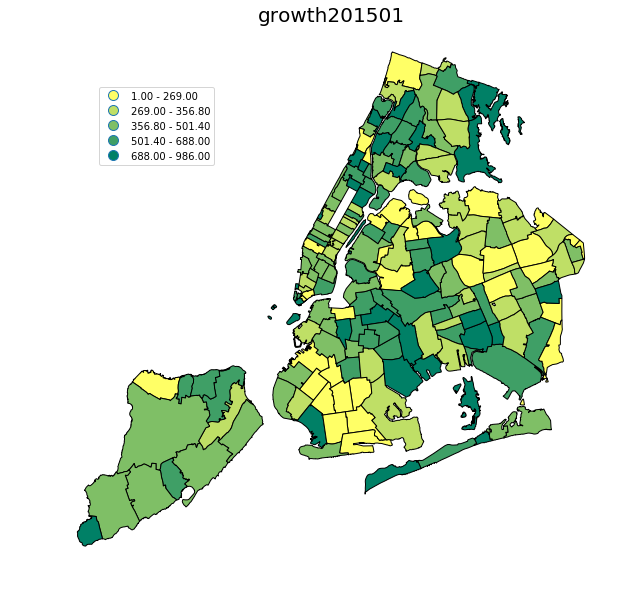

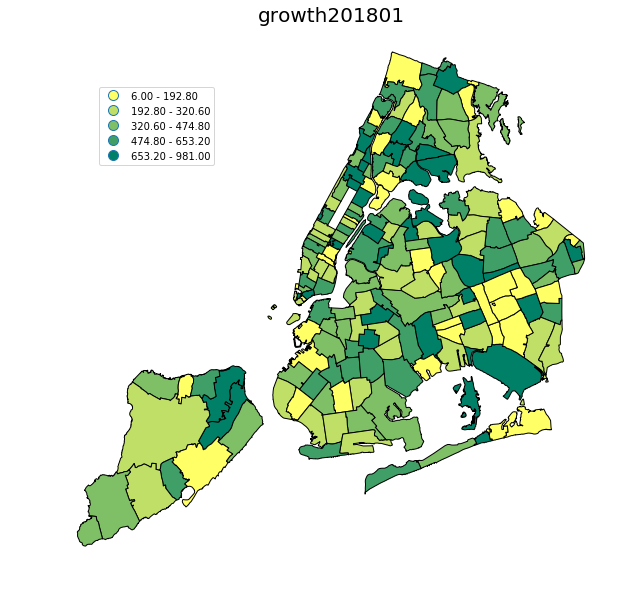

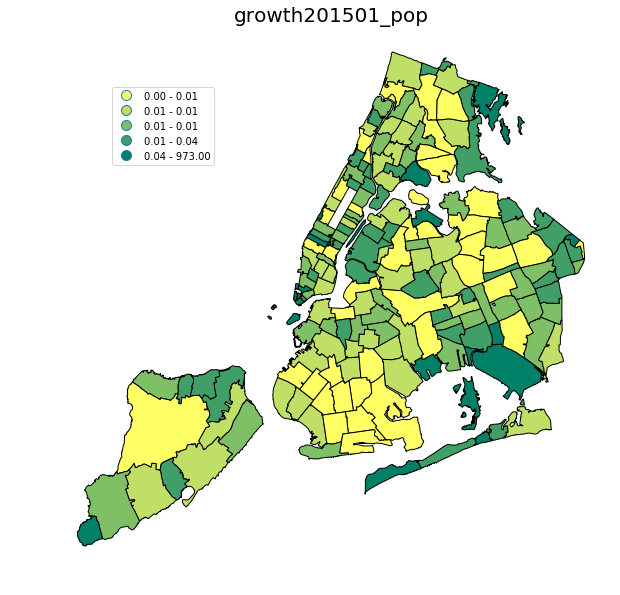

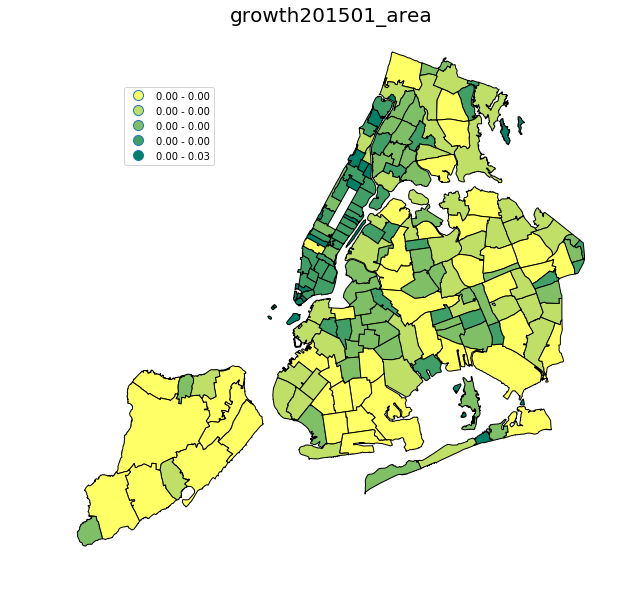

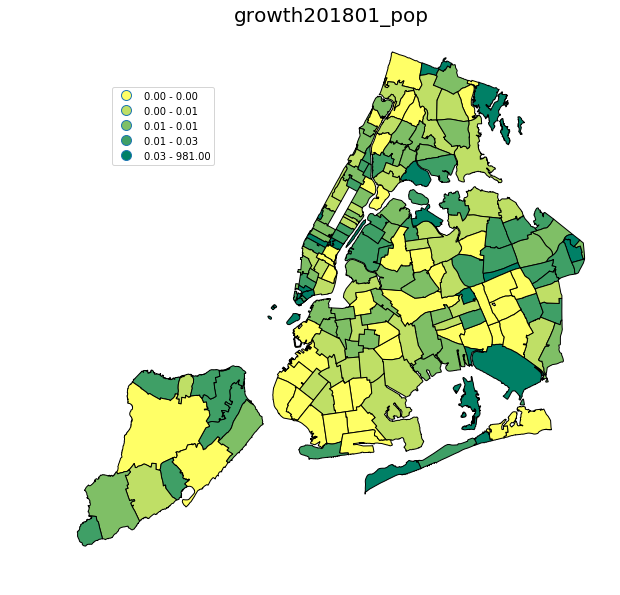

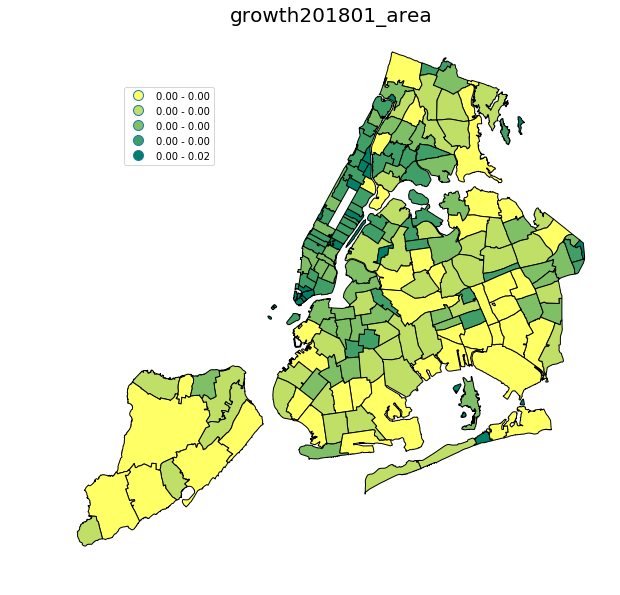

In [35]:
for i,name in enumerate(nycmap.columns[5:].tolist()):
    fig, ax = plt.subplots(figsize=(10,10))
    nycmap.plot(ax=ax, column=name, cmap='summer_r', alpha=1, edgecolor="black", linewidth=1,
               scheme="QUANTILES", legend=True, k=5) 
    ax.set_title(name, fontsize=20)
    ax.set_axis_off()
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((0.1, 0.7, 0.2, 0.2))
    plt.show()